# Advanced Classification Predict

© Explore Data Science Academy

## Honour Code

I, **Jolandie Overbury**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Import Libraries and Read In the Data

Do not modify or remove any of the code in these cells.

In [1]:
from IPython.display import Image
from IPython.display import IFrame
from IPython import display
import pandas as pd
import numpy as np

import nltk
import sklearn
import imblearn
import csv
%matplotlib inline

from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from imblearn.metrics import classification_report_imbalanced

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import string
import urllib
import math
import re

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jolandie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jolandie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') # no labels

train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## Overview

Refer to this diagram to guide you while you build your model. Some of the steps will be fleshed out in this template.

![Overview](process_overview_final.jpg)

## Basic preprocessing

Here is a template you may use for your initial base model. 

### Removing URL's
Write a function that removes URL's from a single tweet. 

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet with URL's removed as a single object

In [4]:
# define function that removes URL from single tweet
def remove_urls(text):
    url_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
#     text = re.sub(pattern=url_pattern, repl='', string=text)
    text = re.sub(pattern=url_pattern, repl='link', string=text)
    return text

**Original object:**

In [5]:
tweet = train['message'][0]
tweet

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

In [6]:
remove_urls(tweet)

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? link via @mashable"

**Expected output:**
```python
remove_urls(tweet)

>>'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late  '
```

### Convert to lowercase

Write a function that converts a single tweet to lowercase.

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet in lowercase as a single object

In [7]:
def to_lower(text):
    text = text.lower() 
    return text

**Original object:**

In [8]:
tweet

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

In [9]:
to_lower(tweet)

"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via @mashable"

**Expected output:**

```python 
to_lower(tweet)
>> 'rt @rawstory: researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…'
```

### Stemming or lemmatising

Write a function that derives the root words for each of the words in a tweet. You may use stemming _or_ lemmatising here.

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet in root words as a _single_ object

In [10]:
def get_roots(text):
    stemmer = SnowballStemmer('english')
    stem_list = [stemmer.stem(word) for word in text.split() if word != '...']
    text = ' '.join(stem_list)
    
#     lemmatizer = WordNetLemmatizer()
#     lem_list = [lemmatizer.lemmatize(word) for word in text.split()]
#     text = ' '.join(lem_list)
      
    return text

**Original object:**

In [11]:
tweet

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

In [12]:
get_roots(tweet)

"polyscimajor epa chief doesn't think carbon dioxid is main caus of global warm and.. wait, what!? https://t.co/yelvcefxkc via @mashabl"

**Expected output:**
```python
get_roots(tweet)
```
Using `SnowballStemmer()`
```python
>> 'rt @rawstory: research say we have three year to act on climat chang befor it too late https://t.co/wdt0kdur2f https://t.co/z0anpt…'
```

Using `WordNetLemmatizer()`
```python
>> 'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'
```

### Other preprocessing techniques 

Come back here once you have submitted your base model to add any other preprocessing functions yuo wish to add

In [13]:
# REMOVE PUNCTUATION
def remove_punctuation(text):
    return ''.join([w for w in text if w not in string.punctuation])

# REMOVE STOP WORDS
def remove_sw(tokens):
    return [t for t in tokens if t not in stopwords.words('english')]



### Tokenising 

Write a function that tokenises a single tweet into a list of tokens.

**Function input:**
- A single string object (tweet) 

**Function output:**
- A list of tokens (objects).

In [14]:
def get_tokens(text):
    tokeniser = TreebankWordTokenizer()
#     tokeniser = word_tokenize()
#     tokeniser = TweetTokenizer()
    token_list = tokeniser.tokenize(text)
    return token_list

**Original object:**

In [15]:
tweet

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

In [16]:
get_tokens(tweet)

['PolySciMajor',
 'EPA',
 'chief',
 'does',
 "n't",
 'think',
 'carbon',
 'dioxide',
 'is',
 'main',
 'cause',
 'of',
 'global',
 'warming',
 'and..',
 'wait',
 ',',
 'what',
 '!',
 '?',
 'https',
 ':',
 '//t.co/yeLvcEFXkC',
 'via',
 '@',
 'mashable']

**Expected output:**
```python
get_tokens(tweet)

>> ['RT',
 '@',
 'RawStory',
 ':',
 'Researchers',
 'say',
 'we',
 'have',
 'three',
 'years',
 'to',
 'act',
 'on',
 'climate',
 'change',
 'before',
 'it’s',
 'too',
 'late',
 'https',
 ':',
 '//t.co/WdT0KdUr2f',
 'https',
 ':',
 '//t.co/Z0ANPT…']
```

Besides the preprocessing methods we've already discussed, can you think of how our data can be improved at this stage?

### Vectorising 

Use the code from the webinar to define your vecotiser. For more details on this function have a look at the `sklearn`
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">package documentation on the function</a>. Recall that this function, unlike the others before takes an _**entire column**_ as an argument.

### Putting all the functions together 

Test your cleaning functions on a single tweet. Perform the cleaning procedure on this tweet from start to finish. Make sure the output looks as you would expect. Store the cleaned tweet in `tweet_final`. Don't worry about vectorising for now.

**_Include any other cleaning procedures you add after your base model_**

**Original object:**

In [17]:
tweet

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

In [18]:
# clean tweet from start to finish
tweet1 = remove_urls(tweet)
tweet2 = to_lower(tweet1)
tweet3 = get_roots(tweet2)
tweet4 = remove_punctuation(tweet3)
tweet5 = get_tokens(tweet4)
tweet_final = remove_sw(tweet5)

# cleaned tweet
tweet_final

['polyscimajor',
 'epa',
 'chief',
 'doesnt',
 'think',
 'carbon',
 'dioxid',
 'main',
 'caus',
 'global',
 'warm',
 'wait',
 'link',
 'via',
 'mashabl']

**Expected output:**
```python
tweet_final
>>['rt',
 '@',
 'rawstory',
 ':',
 'research',
 'say',
 'we',
 'have',
 'three',
 'year',
 'to',
 'act',
 'on',
 'climat',
 'chang',
 'befor',
 'it',
 'too',
 'late']
```

### Preprocessing and cleaning entire column of tweets

Now that we know how to clean a single tweet, we can use `apply()` to clean the entire column in the dataframe. This is what the column looks like to begin with.

In [19]:
train['message'].head()

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
4    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: message, dtype: object

Write code that applies your cleaning functions to the entire `message` column of the dataframe using `.apply()`. Do not vectorise just yet. Store this in a new column, `train['message_clean']`. 

In [20]:
# Cleaning function applied to all messages
def clean_message(text):
    text1 = remove_urls(text)
    text2 = to_lower(text1)
    text3 = get_roots(text2)
    text4 = remove_punctuation(text3)
    text5 = get_tokens(text4)
    text7 = remove_sw(text5)
    return text7

train['message_clean'] = train['message'].apply(clean_message) # YOUR CLEANED DATA COLUMN (WITHOUT VECTORISING)

train['message_clean'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1        [like, lack, evid, anthropogen, global, warm]
2    [rt, rawstory, research, say, three, year, act...
3    [todayinmaker, wire, 2016, pivot, year, war, c...
4    [rt, soynoviodetodas, 2016, racist, sexist, cl...
Name: message_clean, dtype: object

**Expected output:**

```python
train['message_clean'].head()

>>  0    [polyscimajor, epa, chief, does, n't, think, c...
    1    [it, not, like, we, lack, evid, of, anthropoge...
    2    [rt, @, rawstory, :, research, say, we, have, ...
    3    [#, todayinmaker, #, wire, :, 2016, was, a, pi...
    4    [rt, @, soynoviodetodas, :, it, 2016, ,, and, ...
Name: message_clean, dtype: object
```

### Vectorising 

Vectorise your cleaned data using the vectoriser you defined earlier. Don't forget to fit the vectoriser to the data you just cleaned. Store your vectorised data in `train_vec`.

In [21]:
# vectorise cleaned data
vect = TfidfVectorizer(preprocessor=list, tokenizer=list, ngram_range=(1,4), min_df=5, strip_accents='ascii', smooth_idf=False)
train_vec = vect.fit_transform(train['message_clean'])

In [22]:
features = train_vec.toarray()

In [23]:
# ensure labels are integers
train['sentiment'] = train['sentiment'].astype('int64')

### Train Test Split

In [24]:
train.dtypes

sentiment         int64
message          object
tweetid           int64
message_clean    object
dtype: object

In [25]:
y = train['sentiment']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, stratify=y, shuffle=True, random_state=2022)

### Balancing Labels

In [27]:
y_train.value_counts()

 1    6824
 2    2912
 0    1882
-1    1037
Name: sentiment, dtype: int64

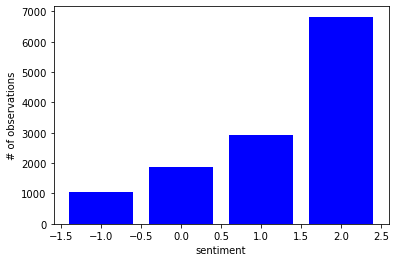

In [28]:
# Count labels
from matplotlib import pyplot as plt
labels = y_train.unique()
heights = y_train.value_counts()
plt.bar(labels, heights, color='blue')
plt.xlabel('sentiment')
plt.ylabel("# of observations")
plt.show()

In [29]:
list_lab = list(labels)
list_lab

[2, 1, 0, -1]

In [30]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

count_df = pd.DataFrame(zip(y_train.value_counts(), list_lab), index=[1, 0, 2, -1], columns=['count', 'labels'])
count_df.set_index('labels')
count_df

,count,labels
1,6824,2
0,2912,1
2,1882,0
-1,1037,-1


In [31]:
# Combine features and labels
data = np.concatenate([X_train, y_train[:,np.newaxis]], axis=1)

<ipython-input-31-2ee220012697>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data = np.concatenate([X_train, y_train[:,np.newaxis]], axis=1)


In [32]:
from sklearn.utils import resample

class_size = 6000

In [33]:
resampled_classes = []

for label in count_df['labels']:
    if len(data[data[:,-1]==label]) < class_size:
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, 
                                  n_samples=class_size, 
                                  random_state=2022) 
    else:
        # Downsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=False, 
                                  n_samples=class_size, 
                                  random_state=2022) 
        
    resampled_classes.append(label_resampled)

In [34]:
resampled_data = np.concatenate(resampled_classes, axis=0)

In [35]:
resampled_data.shape

(24000, 11732)

In [36]:
X_train_resampled = resampled_data[:,:-1]
y_train_resampled = resampled_data[:,-1]

In [37]:
np.unique(y_train_resampled, return_counts=True)

(array([-1.,  0.,  1.,  2.]), array([6000, 6000, 6000, 6000], dtype=int64))

## Fitting a simple model on training data and evaluate its performance

Fit a model on your cleaned data. Use `train_vec` as your features. Note that you need to convert `train_vec` to an array. 

You are familiar with this process, so there is less guidance here. You may also refer to train notebooks and the webinar pdf as guidance.

Your basic model should be a logistic regression, however if you try different models you will also perform the following procedure.

1. Split the training data into features and labels.
2. Split the training data further into training and validation data.
3. Fit the model on the training subset. 
4. Predict on the validation subset.
5. Calculate the performance metrics on the validation predictions.
6. Select a model based on validation performance (when you have more than one model).
8. Clean the test data.
9. Predict on the cleaned test data.
7. Write a csv that matches `sample_submission.csv`.
8. Submit to Kaggle.

In [38]:
# LOGISTIC REGRESSION MODELS
LR = LogisticRegression(solver='liblinear', random_state=2022)
LR.fit(X_train_resampled, y_train_resampled)
LR_y_pred_train = LR.predict(X_train_resampled)
LR_y_pred_test = LR.predict(X_test)
f1_train = f1_score(y_train_resampled, LR_y_pred_train, average='macro')
f1_test = f1_score(y_test, LR_y_pred_test, average="macro")

print('f1 train: ', f1_train)
print('f1 test:  ', f1_test)

f1 train:  0.8995662958921542
f1 test:   0.641763661420123


In [44]:
LR = LogisticRegression(solver='lbfgs', random_state=2022)
LR.fit(X_train_resampled, y_train_resampled)
LR_y_pred_train = LR.predict(X_train_resampled)
LR_y_pred_test = LR.predict(X_test)
f1_train = f1_score(y_train_resampled, LR_y_pred_train, average='macro')
f1_test = f1_score(y_test, LR_y_pred_test, average="macro")

print('f1 train: ', f1_train)
print('f1 test:  ', f1_test)

C:\Users\Jolandie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1 train:  0.9217805738707181
f1 test:   0.6477914439905413


In [ ]:
LR = LogisticRegression(solver='sag', random_state=2022)
LR.fit(X_train_resampled, y_train_resampled)
LR_y_pred_train = LR.predict(X_train_resampled)
LR_y_pred_test = LR.predict(X_test)
f1_train = f1_score(y_train_resampled, LR_y_pred_train, average='macro')
f1_test = f1_score(y_test, LR_y_pred_test, average="macro")

print('f1 train: ', f1_train)
print('f1 test:  ', f1_test)

In [39]:
# # Variance Thresholding
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(threshold=0.000001)
# LR_vt = LogisticRegression(solver='liblinear', random_state=2022)

# X_train_vt = selector.fit_transform(X_train_resampled)
# LR_vt.fit(X_train_vt, y_train_resampled)
# LR_vt_pred_train = LR_vt.predict(X_train_vt)

# X_test_vt = selector.transform(X_test)
# LR_vt_pred_test = LR_vt.predict(X_test_vt)

# f1_train = f1_score(y_train_resampled, LR_vt_pred_train, average='macro')
# f1_test = f1_score(y_test, LR_vt_pred_test, average="macro")

# print('f1 train: ', f1_train)
# print('f1 test:  ', f1_test)

In [40]:
# # K Best Features
# from sklearn import feature_selection
# from sklearn.feature_selection import f_classif

# LR_kb = LogisticRegression(solver='liblinear', random_state=2022)
# selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=10500)

# X_train_kb = selector_kbest.fit_transform(X_train_resampled, y_train_resampled)
# LR_kb.fit(X_train_kb, y_train_resampled)
# LR_kb_pred_train = LR_kb.predict(X_train_kb)

# X_test_kb = selector_kbest.transform(X_test)
# LR_kb_pred_test = LR_kb.predict(X_test_kb)

# f1_train = f1_score(y_train_resampled, LR_kb_pred_train, average='macro')
# f1_test = f1_score(y_test, LR_kb_pred_test, average="macro")

# print('f1 train: ', f1_train)
# print('f1 test:  ', f1_test)

In [1]:
# # LR GRIDSEARCH
# from sklearn.model_selection import GridSearchCV
# LR_parameters = {'C':(0.25, 1.0, 5.0),
#               'solver': ('liblinear', 'lbfgs', 'sag'),
#              'penalty': ('l1', 'l2', 'none')}

# LRM = LogisticRegression(random_state=2022)
# LR_clf = GridSearchCV(LRM, LR_parameters)
# LR_clf.fit(X_train_resampled, y_train_resampled)
# LR_opt_train = LR_clf.predict(X_train_resampled)
# LR_opt_test = LR_clf.predict(X_test)

# f1_train = f1_score(y_train_resampled, LR_opt_train, average='macro')
# f1_test = f1_score(y_test, LR_opt_test, average="macro")
# print('f1 score for training data: ', f1_train)
# print('f1 score for testing data:  ', f1_test)

# LR_clf.best_params_

In [ ]:
# KNN Models
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(100)
KNN.fit(X_train_resampled, y_train_resampled)
KNN_y_pred_train = KNN.predict(X_train_resampled)
KNN_y_pred_test = KNN.predict(X_test)
KNN_f1_train = f1_score(y_train_resampled, KNN_y_pred_train, average='macro')
KNN_f1_test = f1_score(y_test, KNN_y_pred_test, average="macro")

print('KNN f1 train: ', KNN_f1_train)
print('KNN f1 test:  ', KNN_f1_test)

In [ ]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifierCV
RC = RidgeClassifierCV(class_weight='balanced', cv=15)
RC.fit(X_train_resampled, y_train_resampled)
RC_y_pred_train = RC.predict(X_train_resampled)
RC_y_pred_test = RC.predict(X_test)
RC_f1_train = f1_score(y_train_resampled, RC_y_pred_train, average='macro')
RC_f1_test = f1_score(y_test, RC_y_pred_test, average='macro')

print('RC f1 train: ', RC_f1_train)
print('RC f1 test:  ', RC_f1_test)

In [ ]:
# RC GRIDSEARCH
from sklearn.linear_model import RidgeClassifierCV
RC_parameters = {'cv': ('none', 5, 10)}

RCM = RidgeClassifierCV(random_state=2022)
RC_clf = GridSearchCV(RCM, RC_parameters)
RC_clf.fit(X_train_resampled, y_train_resampled)
RC_opt_train = RC_clf.predict(X_train_resampled)
RC_opt_test = RC_clf.predict(X_test)

f1_train = f1_score(y_train_resampled, RC_opt_train, average='macro')
f1_test = f1_score(y_test, RC_opt_test, average="macro")
print('f1 score for training data: ', f1_train)
print('f1 score for testing data:  ', f1_test)

RC_clf.best_params_

In [50]:
# SVC Models
from sklearn.svm import SVC
SVC = SVC(kernel='linear', C=1)
SVC.fit(X_train_resampled, y_train_resampled)
SVC_y_pred_train = SVC.predict(X_train_resampled)
SVC_y_pred_test = SVC.predict(X_test)
SVC_f1_train = f1_score(y_train_resampled, SVC_y_pred_train, average='macro')
SVC_f1_test = f1_score(y_test, SVC_y_pred_test, average="macro")

print('SVC f1 train: ', SVC_f1_train)
print('SVC f1 test:  ', SVC_f1_test)

In [57]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf', C=1)
SVC.fit(X_train_resampled, y_train_resampled)
SVC_y_pred_train = SVC.predict(X_train_resampled)
SVC_y_pred_test = SVC.predict(X_test)
SVC_f1_train = f1_score(y_train_resampled, SVC_y_pred_train, average='macro')
SVC_f1_test = f1_score(y_test, SVC_y_pred_test, average="macro")

print('SVC f1 train: ', SVC_f1_train)
print('SVC f1 test:  ', SVC_f1_test)

SVC f1 train:  0.9892036578833011
SVC f1 test:   0.6583580387416669


In [ ]:
# SVC GRIDSEARCH
SVC_parameters = {'C':(0.25, 1.0, 5.0),
              'kernel': ('linear', 'rbf'),
             'gamma': (1, 2)}

SVCM = SVC(random_state=2022)
SVC_clf = GridSearchCV(SVCM, SVC_parameters)
SVC_clf.fit(X_train_resampled, y_train_resampled)
SVC_opt_train = SVC_clf.predict(X_train_resampled)
SVC_opt_test = SVC_clf.predict(X_test)

f1_train = f1_score(y_train_resampled, SVC_opt_train, average='macro')
f1_test = f1_score(y_test, SVC_opt_test, average="macro")
print('f1 score for training data: ', f1_train)
print('f1 score for testing data:  ', f1_test)

SVC_clf.best_params_

In [ ]:
# # RANDOM FOREST MODELS
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(max_depth=15, n_estimators=100, random_state=2022)
# rf.fit(X_train_resampled, y_train_resampled)
# rf_y_pred_train = rf.predict(X_train_resampled)
# rf_y_pred_test = rf.predict(X_test)
# rf_f1_train = f1_score(y_train_resampled, rf_y_pred_train, average='macro')
# rf_f1_test = f1_score(y_test, rf_y_pred_test, average="macro")

# print('RF f1 train: ', rf_f1_train)
# print('RF f1 test:  ', rf_f1_test)

In [ ]:
# RF GRIDSEARCH
RF_parameters = {'max_depth':(5.0, 15.0, 25.0),
              'min_samples_leaf': (2.0, 5.0, 10.0),
             'n_estimators': (50, 100, 1000)}

RFM = RandomForestClassifier(random_state=2022)
RF_clf = GridSearchCV(RFM, RF_parameters)
RF_clf.fit(X_train_resampled, y_train_resampled)
RF_opt_train = RF_clf.predict(X_train_resampled)
RF_opt_test = RF_clf.predict(X_test)

f1_train = f1_score(y_train_resampled, RF_opt_train, average='macro')
f1_test = f1_score(y_test, RF_opt_test, average="macro")
print('f1 score for training data: ', f1_train)
print('f1 score for testing data:  ', f1_test)

RF_clf.best_params_

In [ ]:
# # ADABOOST MODELS
# from sklearn.ensemble import AdaBoostClassifier
# ab = AdaBoostClassifier(learning_rate=0.5, random_state=2022)
# ab.fit(X_train_resampled, y_train_resampled)
# ab_y_pred_train = ab.predict(X_train_resampled)
# ab_y_pred_test = ab.predict(X_test)
# ab_f1_train = f1_score(y_train_resampled, ab_y_pred_train, average='macro')
# ab_f1_test = f1_score(y_test, ab_y_pred_test, average="macro")

# print('AB f1 train: ', ab_f1_train)
# print('AB f1 test:  ', ab_f1_test)

In [2]:
# # AB GRIDSEARCH
# AB_parameters = {'base_estimator':('RidgeClassifier(random_state=2022)', "SVC(kernel='rbf', random_state=2022)"),
#               'learning_rate': (0.1, 0.5, 1.0),
#              'n_estimators': (50, 100, 1000)}

# ABM = AdaBoostClassifier(random_state=2022)
# AB_clf = GridSearchCV(ABM, AB_parameters)
# AB_clf.fit(X_train_resampled, y_train_resampled)
# AB_opt_train = AB_clf.predict(X_train_resampled)
# AB_opt_test = AB_clf.predict(X_test)

# f1_train = f1_score(y_train_resampled, AB_opt_train, average='macro')
# f1_test = f1_score(y_test, AB_opt_test, average="macro")
# print('f1 score for training data: ', f1_train)
# print('f1 score for testing data:  ', f1_test)

# AB_clf.best_params_

***CLEANING TEST DATA***

In [58]:
test['message_clean'] = test['message'].apply(clean_message)

In [59]:
test_vec = vect.transform(test['message_clean'])
X = test_vec.toarray()

In [60]:
final_model = SVC
predictions = final_model.predict(X)
pred_submit = pd.DataFrame(predictions, columns=['sentiment']).astype('int32')
pred_submit.head()

,sentiment
0,1
1,1
2,1
3,1
4,0


In [61]:
id_df = test['tweetid']
final_df = pd.concat([id_df.reset_index(drop=True), pred_submit], axis=1).rename(columns = {0:'sentiment'})
final_df.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [62]:
final_df.to_csv('sub19.csv', index=False)

## Suggestions on how to improve the model - Extras 

Here are some ideas on how you can improve your model. Try some of them out once you have submitted your base model to Kaggle. Only use the methods you find improve your model performance.

 - Additional preprocessing 
     - Use some of the methods in the notebooks to balance the data
     - Replace links with the text `Link` to show the machine that there is a link present without the extraneous detail of the link text
     - Remove punctuation
     - Correct spelling
     - Bag of words vs. N-grams - which is better?
     - Try `TweetTokenizer()` - how does this differ from the tokenisers you are familiar with?
 - Consider which other models could do a better job (refer to course resources)
 - Consider some further feature engineering:
     - What other attributes of the tweets may be useful?
     - Should we perform feature selection given their size and sparseness of the vectorised tweets?
 - If you've mastered the above, try implementing hyperparameter tuning methods.
 - Compare all the models you try and remember to submit **the best one** based on test performance (f1-score using macro averaging). 
 
You may use the space below to try out these "Extras".

In [ ]:
# Extras
# YOUR CODE HERE 




## How/why is the model bad?

Do you have any hypotheses as to how you can improve the model further? Use this space to investigate with mindful EDA if necessary.

In [ ]:
# EDA
# YOUR CODE HERE 





Be sure to check whether each additional technique you apply actually improves your model performance.

## Submit your best model predictions 

Don't forget to submit your the predictions on the best model to Kaggle.

In [ ]:
# write csv for best predictions


